# Weather Data Analysis (Saudi Arabia, 2022–2025)

**Goal:** Explore Saudi weather data (temperature trends, humidity distribution, and dominant weather conditions).

**Stack:** Python (pandas, matplotlib, seaborn), Jupyter/Colab.

> Note: The dataset records *no rainfall* across the period; therefore, analysis focuses on temperature, humidity, and conditions (e.g., Fair, Cloudy, Dust, Fog).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create folder for figures
os.makedirs("figures", exist_ok=True)


## 1) Data Loading
- Upload CSV into Colab.
- Read into DataFrame `df`.
- Quick inspection of columns and first rows.


In [2]:
from google.colab import files

uploaded = files.upload()   # اختاري ملف weather_data.csv
df = pd.read_csv("weather_data.csv")
df.head()


Saving weather_data.csv to weather_data.csv


,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip.,Condition
0,2022-01-01,12:00 AM,57 °F,52 °F,82 %,E,8 mph,0 mph,28.00 in,0.0 in,Fog
1,2022-01-01,1:00 AM,55 °F,52 °F,88 %,ESE,6 mph,0 mph,28.00 in,0.0 in,Fog
2,2022-01-01,2:00 AM,55 °F,52 °F,88 %,ESE,6 mph,0 mph,28.00 in,0.0 in,Fog
3,2022-01-01,3:00 AM,55 °F,54 °F,94 %,ESE,6 mph,0 mph,27.97 in,0.0 in,Fog
4,2022-01-01,3:21 AM,57 °F,54 °F,88 %,ESE,6 mph,0 mph,28.00 in,0.0 in,Thunder


## 2) Data Cleaning & Feature Engineering
- Combine `Date` and `Time` → `datetime`.
- Extract `year` and `month`.
- Convert `Temperature` from string to numeric.
- Clean precipitation (remains 0 throughout dataset).


In [10]:
# Convert Date + Time to datetime
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

# Extract year and month
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

# Clean Temperature column (remove °F and convert to float)
df['Temperature_clean'] = df['Temperature'].str.replace('°F', '', regex=False).astype(float)

# Clean Humidity column (remove % and convert to float)
df['Humidity_clean'] = df['Humidity'].str.replace('%', '', regex=False).astype(float)

# Clean Precipitation column (remove "in" and convert to float)
df['Precip_clean'] = df['Precip.'].str.replace(' in', '', regex=False).astype(float)


/tmp/ipython-input-3120077552.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


## 3) Exploratory Data Analysis (EDA)
- Monthly average temperature per year.
- Yearly rainfall (empty).
- Weather conditions counts.


In [11]:
# Monthly average temperature
monthly_temp = df.groupby(['year', 'month'])['Temperature_clean'].mean().reset_index()

# Weather conditions count
condition_counts = df['Condition'].value_counts(dropna=False)

# Humidity stats
print("Humidity stats:")
print(df['Humidity_clean'].describe())

# Precipitation stats
print("Precipitation stats:")
print(df['Precip_clean'].describe())


Humidity stats:
count    27290.000000
mean        28.042433
std         20.972180
min          3.000000
25%         12.000000
50%         22.000000
75%         38.000000
max        100.000000
Name: Humidity_clean, dtype: float64
Precipitation stats:
count    27290.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Precip_clean, dtype: float64


## 4) Visualizations
- Line chart: Monthly temperature trends.
- Bar chart: Top 10 weather conditions.
- (Optional) Histogram/Boxplot for humidity.

Line chart = Monthly Temp Trends.
Bar chart = Top 10 Conditions.
Histogram = Humidity

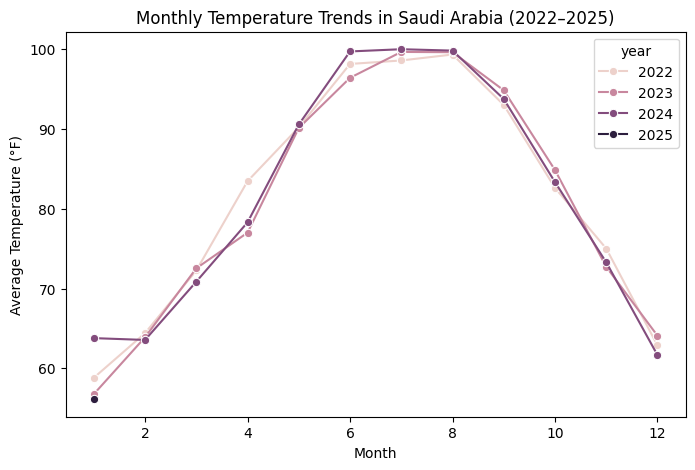

In [12]:
plt.figure(figsize=(8,5))
sns.lineplot(data=monthly_temp, x="month", y="Temperature_clean", hue="year", marker="o")
plt.title("Monthly Temperature Trends in Saudi Arabia (2022–2025)")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°F)")
plt.savefig("figures/temperature_trend.png", dpi=200, bbox_inches="tight")
plt.show()


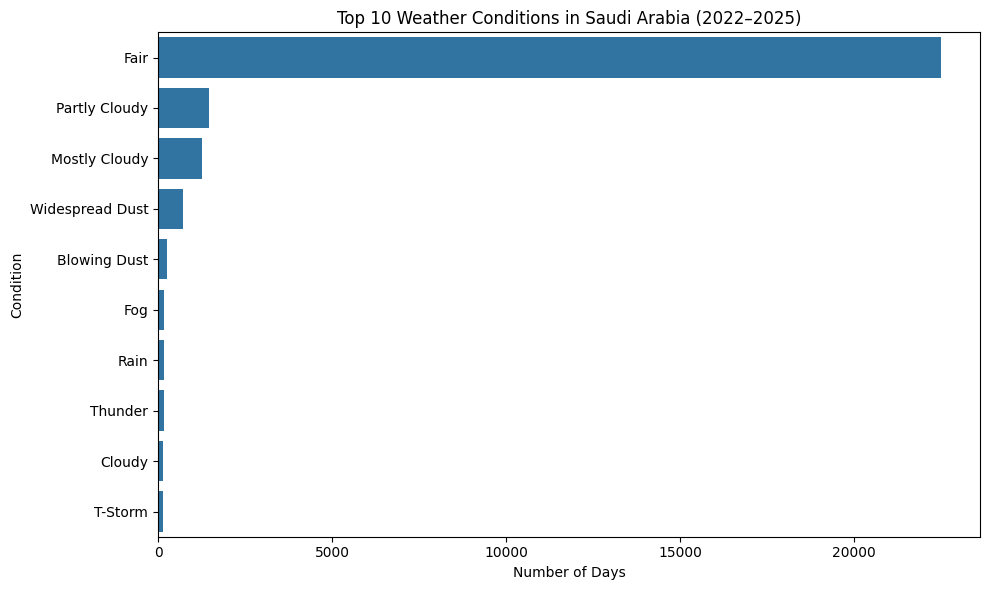

In [13]:
top_conditions = condition_counts.head(10).reset_index()
top_conditions.columns = ['Condition','Days']

plt.figure(figsize=(10,6))
sns.barplot(data=top_conditions, y='Condition', x='Days')
plt.title("Top 10 Weather Conditions in Saudi Arabia (2022–2025)")
plt.xlabel("Number of Days")
plt.ylabel("Condition")
plt.tight_layout()
plt.savefig("figures/top10_conditions_bar.png", dpi=200, bbox_inches="tight")
plt.show()


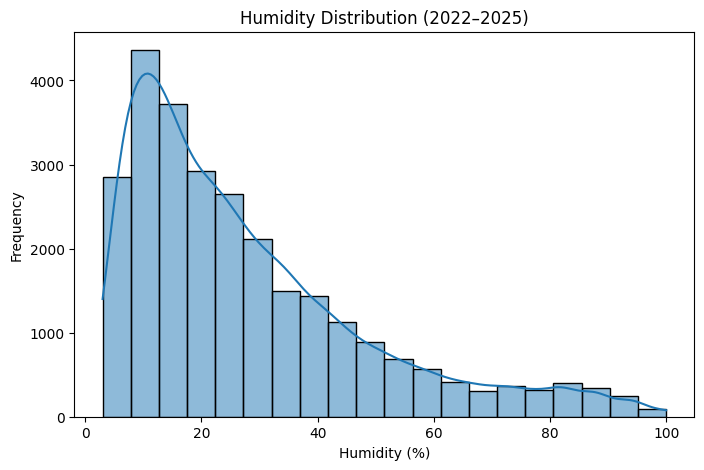

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['Humidity_clean'], bins=20, kde=True)
plt.title("Humidity Distribution (2022–2025)")
plt.xlabel("Humidity (%)")
plt.ylabel("Frequency")
plt.savefig("figures/humidity_hist.png", dpi=200, bbox_inches="tight")
plt.show()


## 5) Findings & Conclusion
- "Fair" weather dominates (~80%+).
- Rainfall values are all 0.0 (limitation of dataset).
- Seasonal temperature patterns are clear (hot summers, cooler winters).

### Next Steps
- Add external rainfall dataset for more complete analysis.
- Extend to multi-city or station-level comparisons.
